In [2]:
import pandas as pd
print(pd.__version__)


2.3.3


In [3]:
df= pd.read_csv(r'customer_shopping_behavior.csv')

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [8]:
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [11]:
df['Review Rating']= df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.median()))

In [14]:
df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)

C:\Users\manik\AppData\Local\Temp\ipykernel_16552\4130701081.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)


In [15]:
df.drop_duplicates(inplace=True)

In [19]:
cleaned_info = {
    "Missing Values After Cleaning": df.isnull().sum().sum(),
    "Duplicate Rows After Cleaning": df.duplicated().sum(),
    "Total Rows": df.shape[0],
    "Total Columns": df.shape[1]
}

In [20]:
df.columns = df.columns.str.lower().str.replace(' ', '_')   
df=df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})    

In [21]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

create a column age_group

In [22]:
lables =['young adult', 'adult', 'middle-aged' , 'senior']
df['age_group'] = pd.qcut(df['age'],q=4, labels=lables)

In [23]:
df[['age','age_group']].head(10)

,age,age_group
0,55,middle-aged
1,19,young adult
2,50,middle-aged
3,21,young adult
4,45,middle-aged
5,46,middle-aged
6,63,senior
7,27,young adult
8,26,young adult
9,57,middle-aged


create a column purchase_frequency_days

In [26]:
frequency_mapping = {
    'fortnightly':14,
    'monthly':30,
    'weekly':7,
    'quarterly':90,
    'annually':365,
    'bi-weekly':14
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [27]:
df[['purchase_frequency_days','frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,NaN,Fortnightly
1,NaN,Fortnightly
2,NaN,Weekly
3,NaN,Weekly
4,NaN,Annually
5,NaN,Weekly
6,NaN,Quarterly
7,NaN,Weekly
8,NaN,Annually
9,NaN,Quarterly


In [28]:
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [29]:
(df['discount_applied']== df['promo_code_used']).all()

np.True_

In [30]:
df.drop('promo_code_used', axis=1, inplace=True)

In [31]:
df.columns


Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

In [32]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sqlalchemy import create_engine


step1: connect to postgresql

In [34]:
username="postgres"
password="admin"
host="localhost"
port="5433"
database="manikdb"
engine= create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')


step2: load dataframe to postgresql

In [35]:
table_name='customer'
df.to_sql(table_name, engine, if_exists='replace', index=False)

print(f"Data successfully loaded into the '{table_name}' table in the PostgreSQL database.")

Data successfully loaded into the 'customer' table in the PostgreSQL database.


In [37]:
pip install matplotlib seaborn scikit-learn numpy

  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---------------------------------------- 0/2 [matplotlib]
   ---

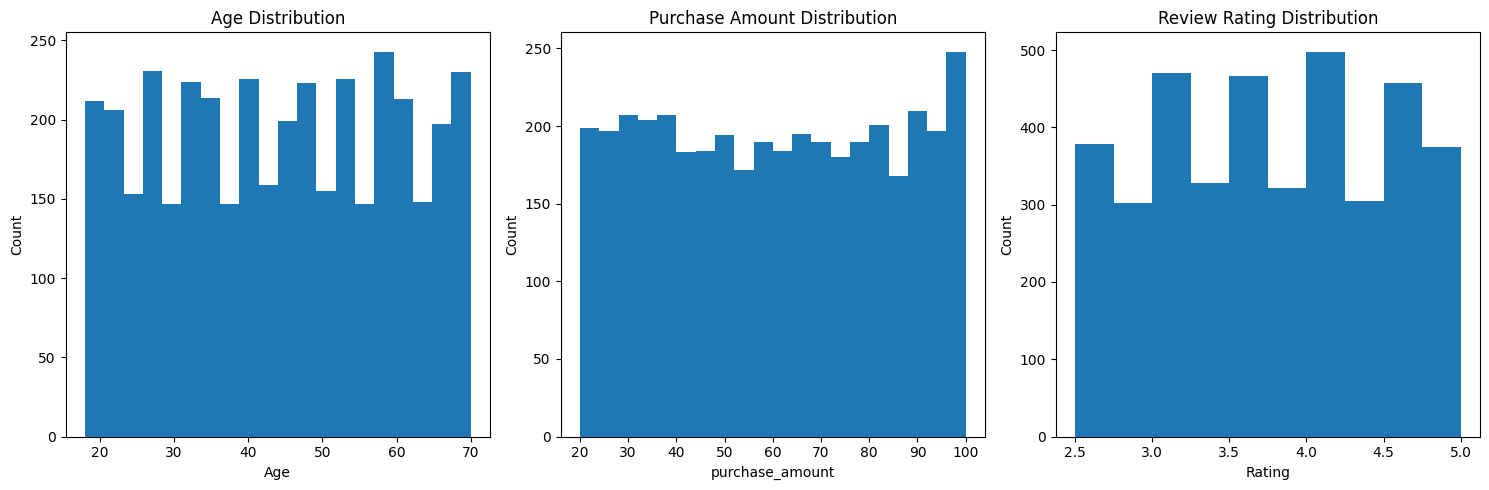

In [41]:
import matplotlib.pyplot as plt

# --- Exploratory Data Analysis (EDA) ---

# Summary statistics
summary_stats = df[['age', 'purchase_amount', 'review_rating', 'previous_purchases']].describe()

# Plot distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(df['purchase_amount'], bins=20)
plt.title('Purchase Amount Distribution')
plt.xlabel('purchase_amount')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(df['review_rating'], bins=10)
plt.title('Review Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()




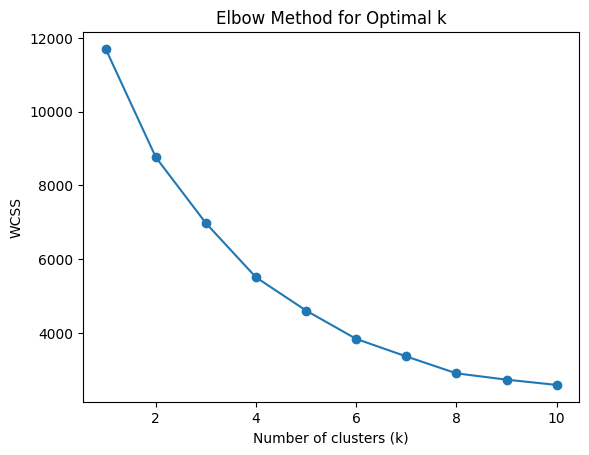

,age,purchase_amount,previous_purchases
Cluster,,,
0,56.780149,82.472785,28.302028
1,32.372299,63.258350,11.209234
2,30.949462,57.781720,38.545161
3,56.084729,37.113300,24.723153


In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# --- Feature Selection for Clustering ---
features = df[['age', 'purchase_amount', 'previous_purchases']]

# Encode categorical columns (if needed for advanced models)
encoder = LabelEncoder()
df['Gender_encoded'] = encoder.fit_transform(df['gender'])

# Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# --- Determine Optimal Number of Clusters using Elbow Method ---
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# --- Apply K-Means Clustering (based on elbow) ---
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Cluster summary
cluster_summary = df.groupby('Cluster')[['age', 'purchase_amount', 'previous_purchases']].mean()
cluster_summary
